
# How to Train YOLO11 Object Detection on a Custom Dataset

---

## Setup

In [1]:
!nvidia-smi

Tue Nov 19 05:39:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              15W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.33 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

## Inference with model pre-trained on COCO dataset

### CLI

**NOTE:** CLI requires no customization or Python code. You can simply run all tasks from the terminal with the yolo command.

### SDK

**NOTE:** YOLO's Python interface allows for seamless integration into your Python projects, making it easy to load, run, and process the model's output.

## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dEl35DkAiYAmOkN7osqu")
project = rf.workspace("akankshyaparida").project("bolt-loosening-detection-zqvku")
version = project.version(1)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to bolt-loosening-detection-1 in yolov11:: 100%|██████████| 212/212 [00:00<00:00, 5113.03it/s]


## Custom Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 5.35M/5.35M [00:00<00:00, 367MB/s]
Ultralytics 8.3.33 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/datasets/bolt-loosening-detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, s

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					   P_curve.png	     train_batch200.jpg
confusion_matrix_normalized.png			   PR_curve.png      train_batch201.jpg
confusion_matrix.png				   R_curve.png	     train_batch202.jpg
events.out.tfevents.1731994801.dc69c13beba2.696.0  results.csv	     train_batch2.jpg
F1_curve.png					   results.png	     val_batch0_labels.jpg
labels_correlogram.jpg				   train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					   train_batch1.jpg  weights


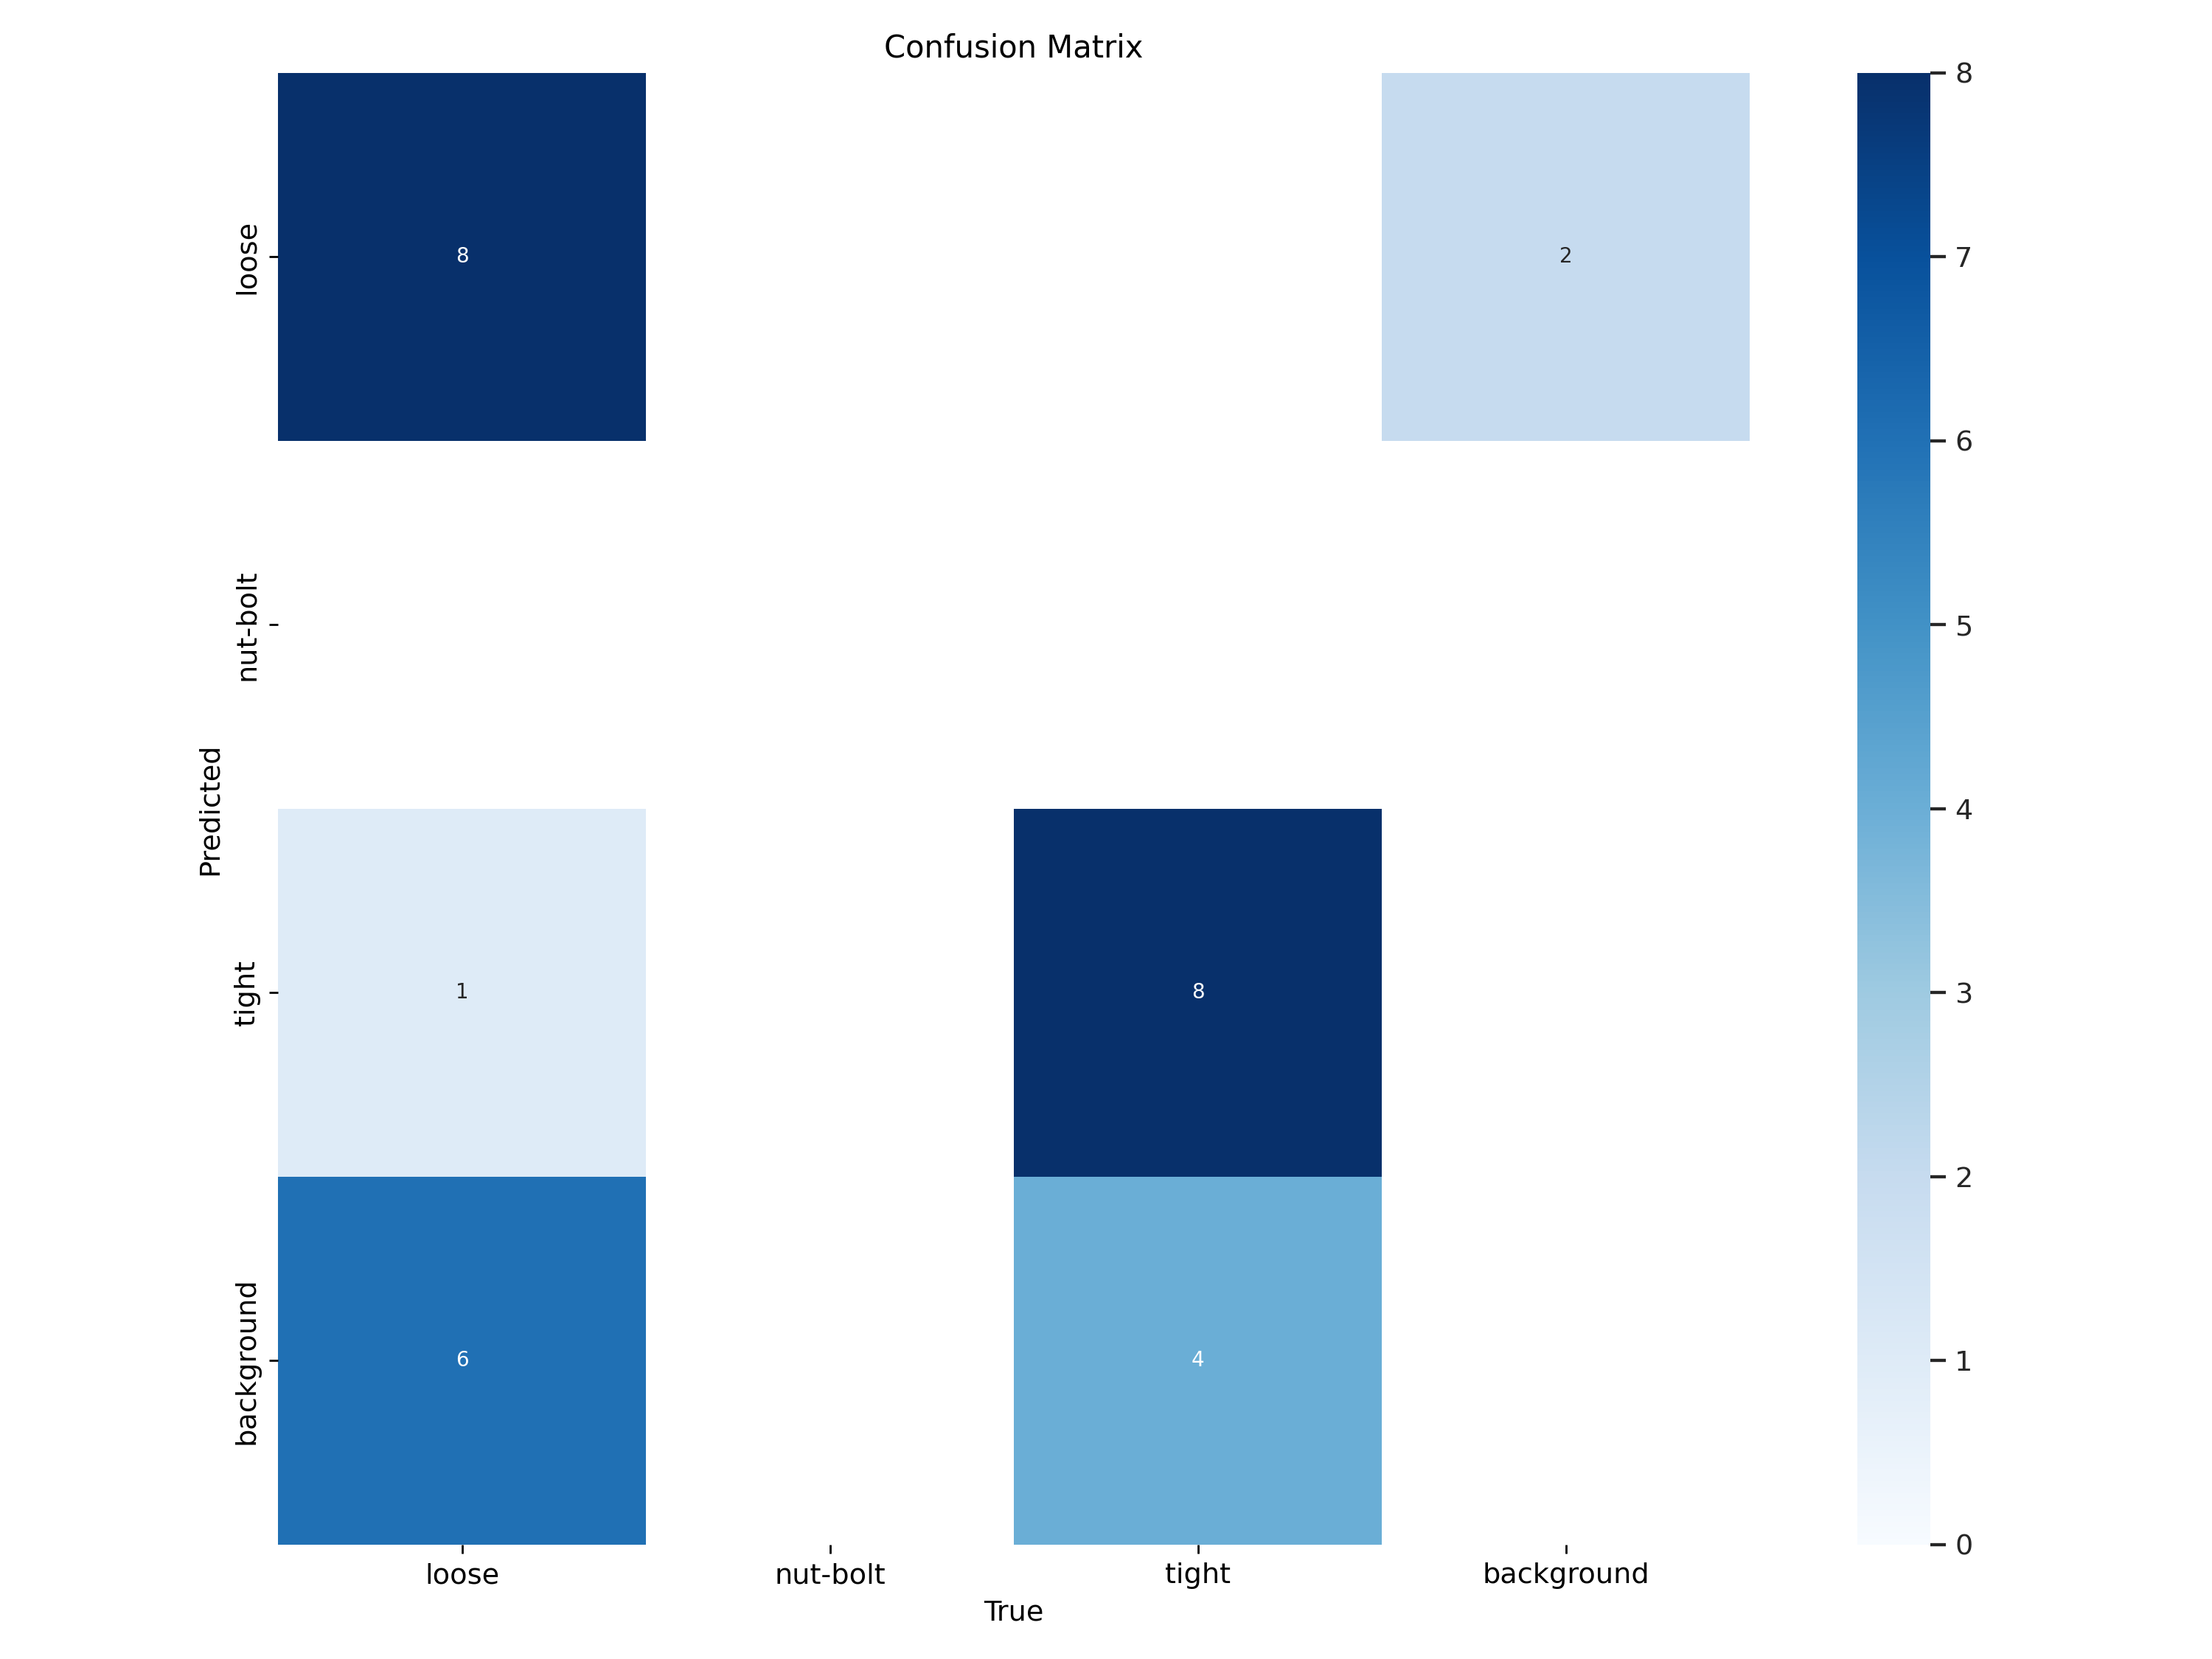

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

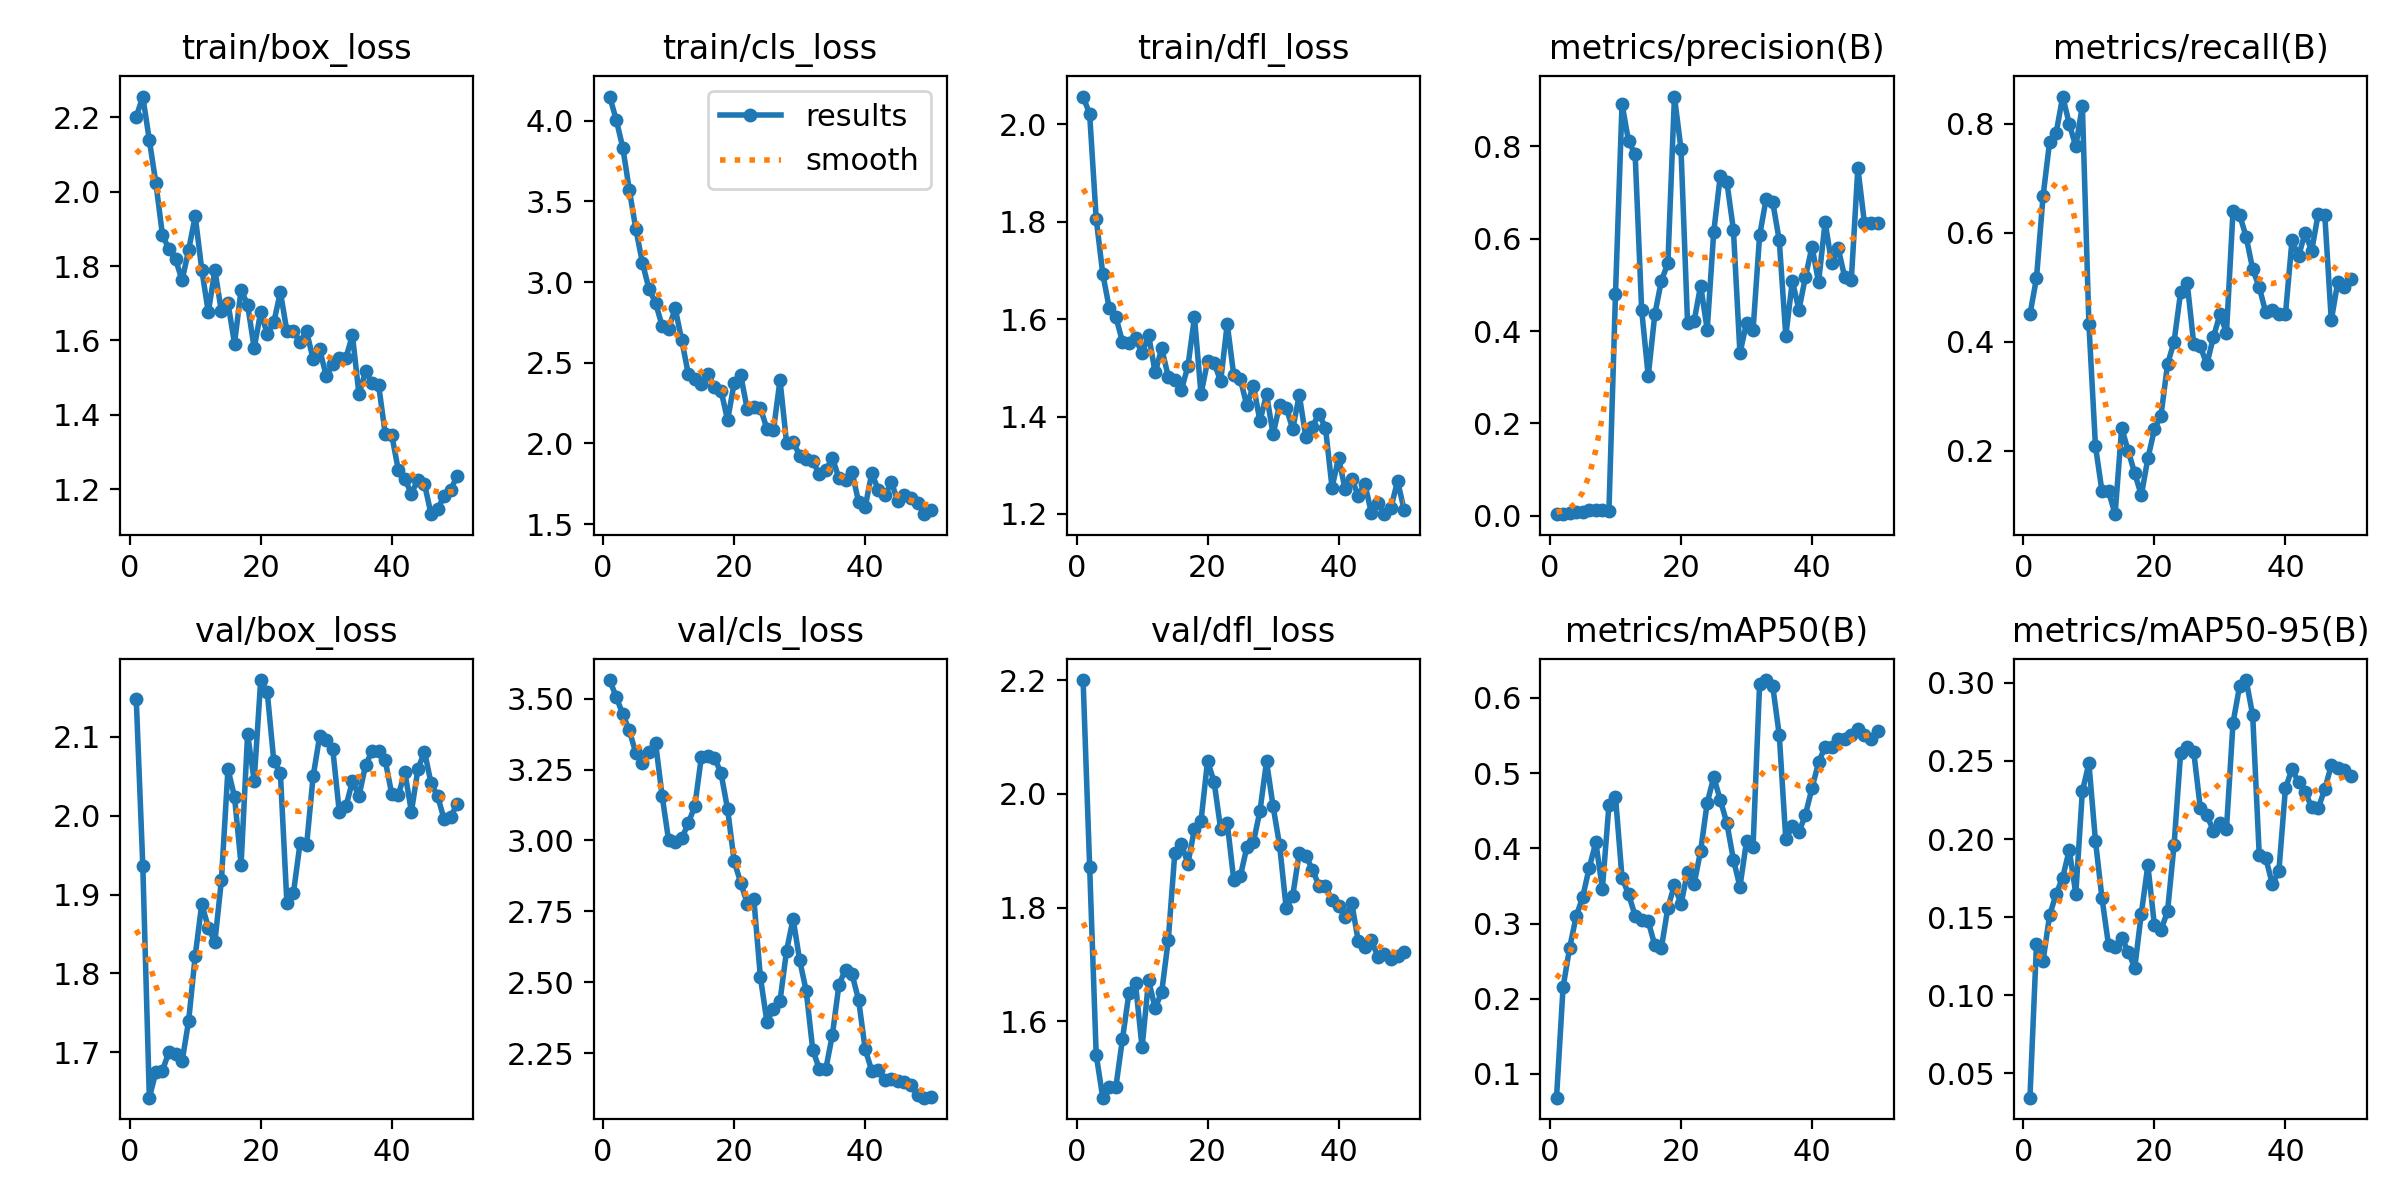

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

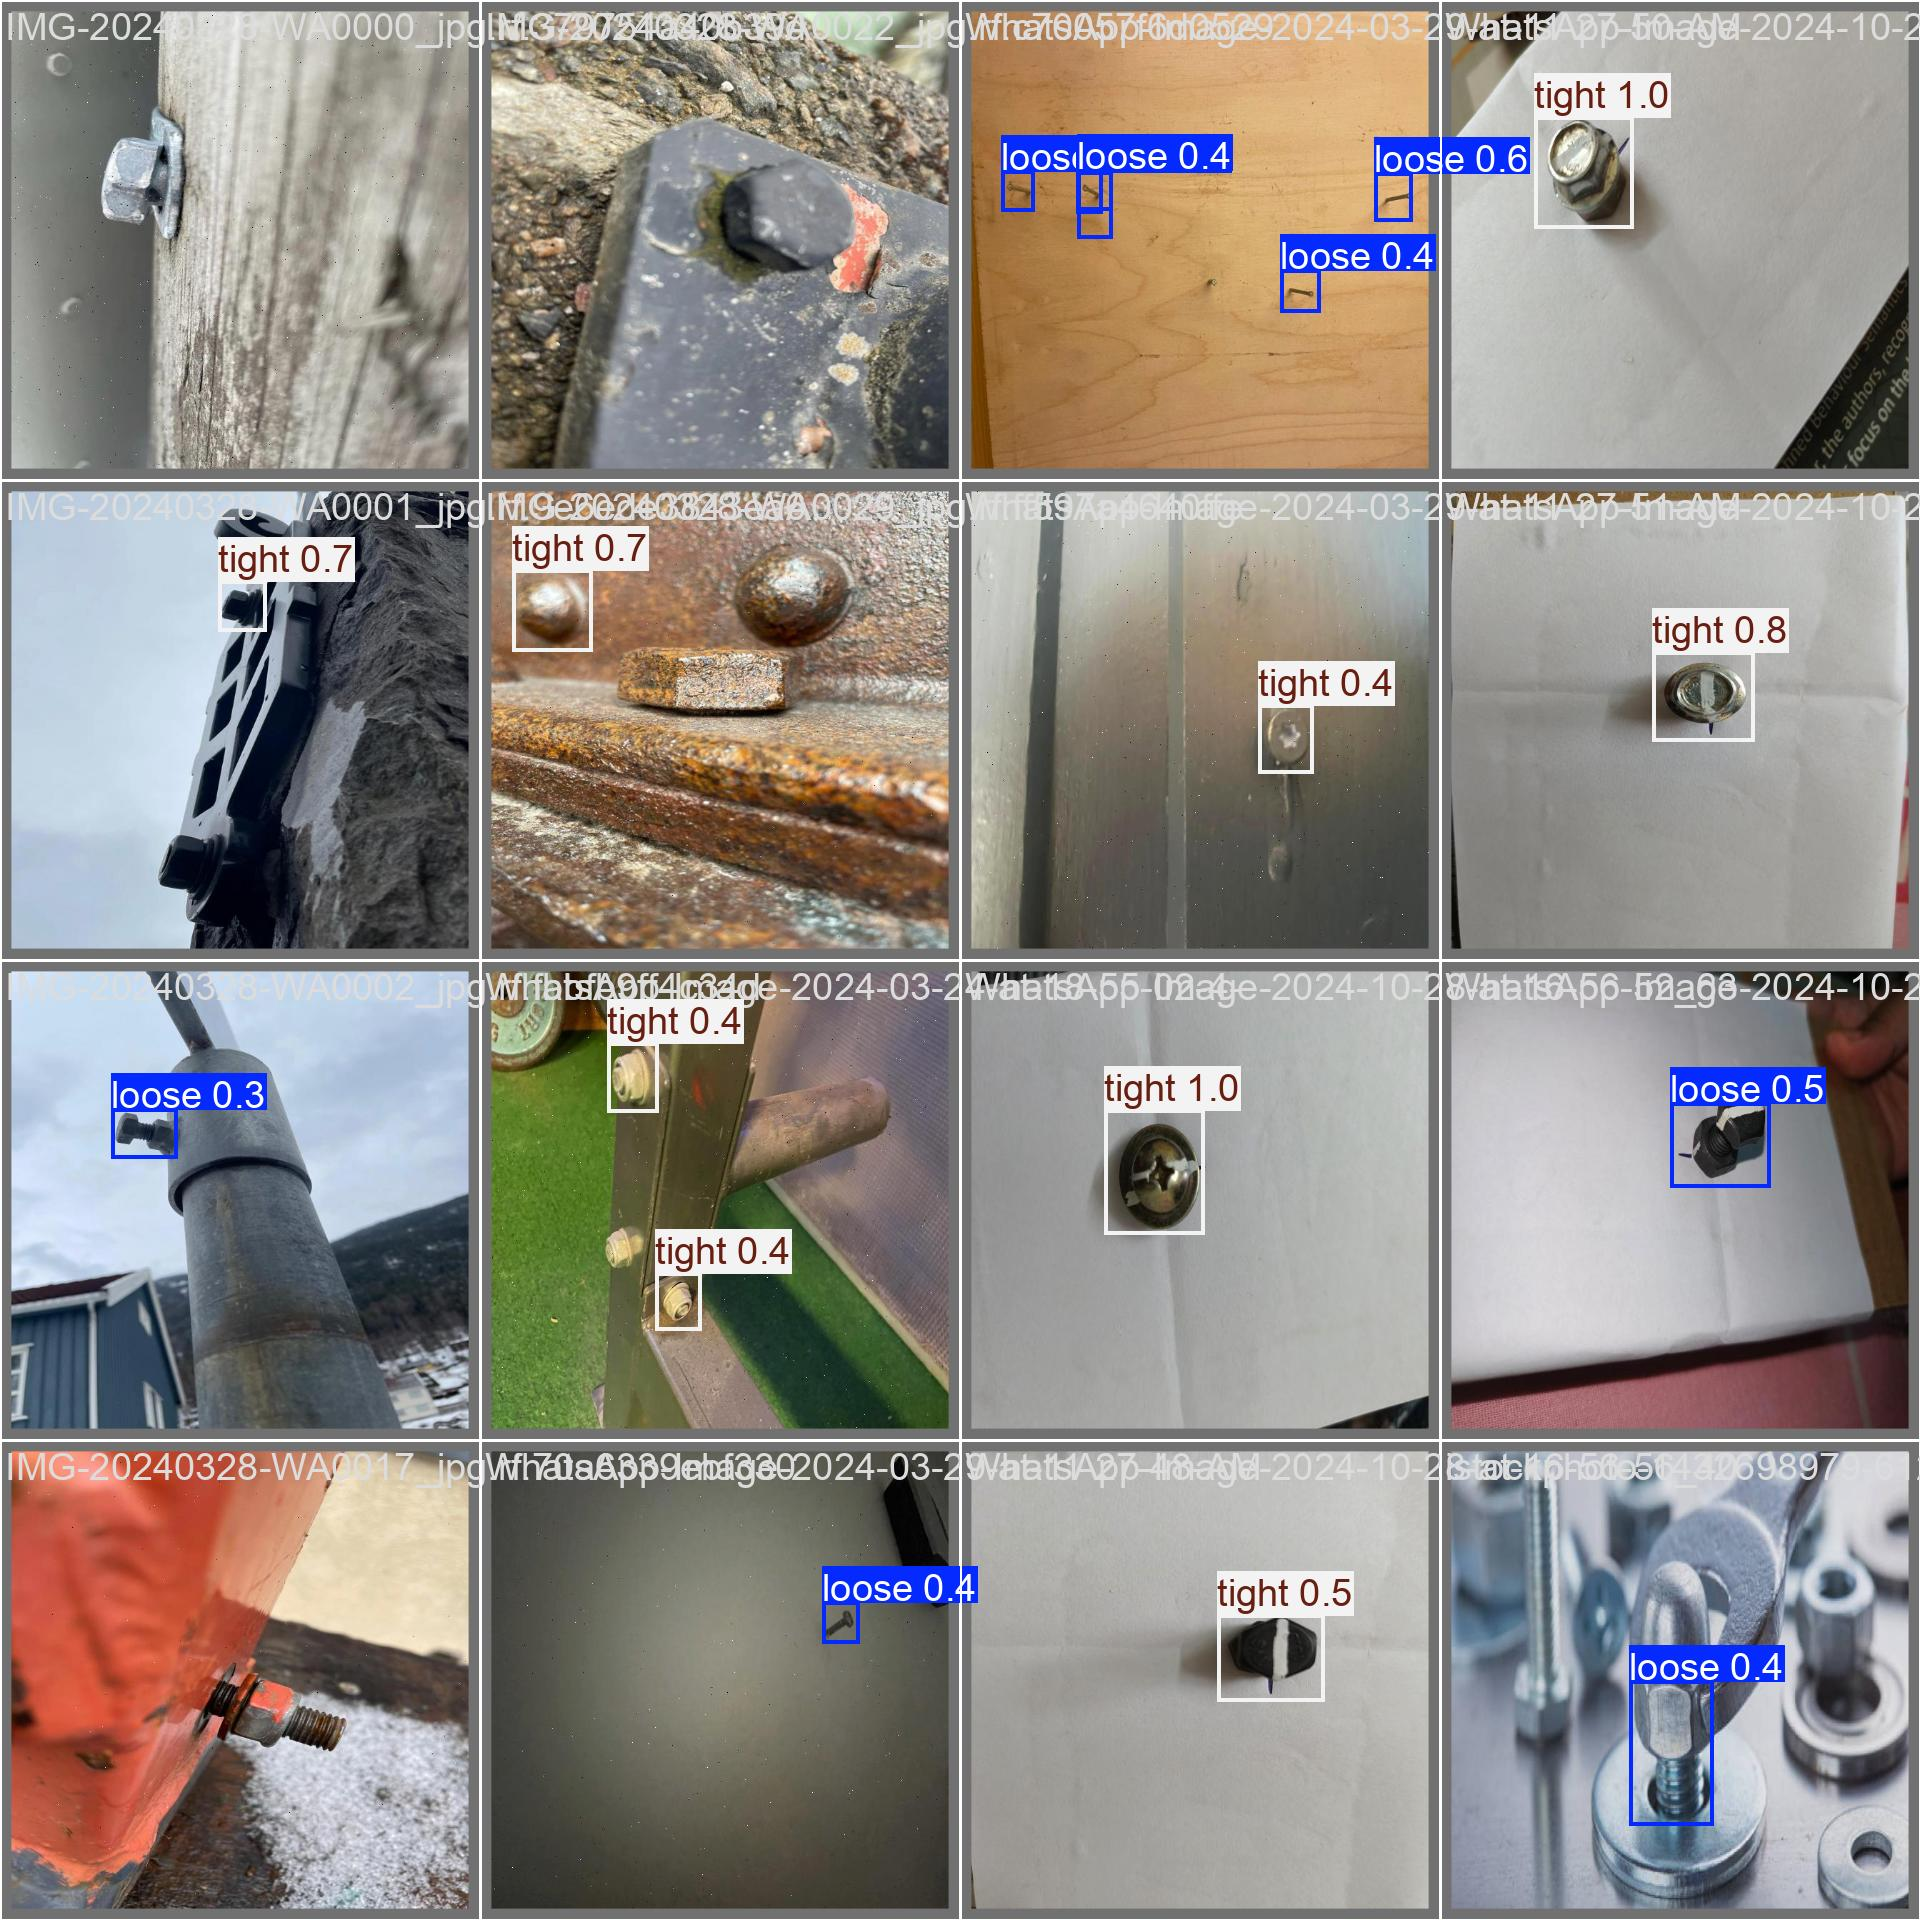

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [11]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/download best.pt data={dataset.location}/data.yaml

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 897, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 481, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'best.pt' is not a valid YOLO argument. 

    Arguments received: ['yolo', 'task=detect', 'mode=val', 'model=/content/runs/detect/train/weights/download', 'best.pt', 'data=/content/datasets/bolt-loosening-detection-1/data.yaml']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'pose', 'segment', 'classify', 'obb', 'detect'}
                MODE (required) is one of {'train', 'export', 'predict', 'val', 'benchmark', 'track'}
                ARGS (optional) are any number of cu

## Inference with custom model

In [12]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.33 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/10 /content/datasets/bolt-loosening-detection-1/test/images/IMG-20240328-WA0007_jpg.rf.1d9e05597eaaacf59ebc62969dbe4e6e.jpg: 640x640 1 tight, 13.3ms
image 2/10 /content/datasets/bolt-loosening-detection-1/test/images/IMG-20240328-WA0021_jpg.rf.1ae79b7d123c482cfc56ffdd1c8a9404.jpg: 640x640 (no detections), 9.0ms
image 3/10 /content/datasets/bolt-loosening-detection-1/test/images/IMG-20240328-WA0026_jpg.rf.520fc6a280835cf5fe1899bcd4298b1f.jpg: 640x640 (no detections), 9.5ms
image 4/10 /content/datasets/bolt-loosening-detection-1/test/images/WhatsApp-Image-2024-03-24-at-18-55-02-17-_jpeg_jpg.rf.73c1141bb85a908977c4ebb112e2b482.jpg: 640x640 1 tight, 7.9ms
image 5/10 /content/datasets/bolt-loosening-detection-1/test/images/WhatsApp-Image-2024-03-24-at-18-55-02-7-_jpeg_jpg.rf.b04f74424283da329c97f7ce51120819.jpg: 640x640

**NOTE:** Let's take a look at few results.

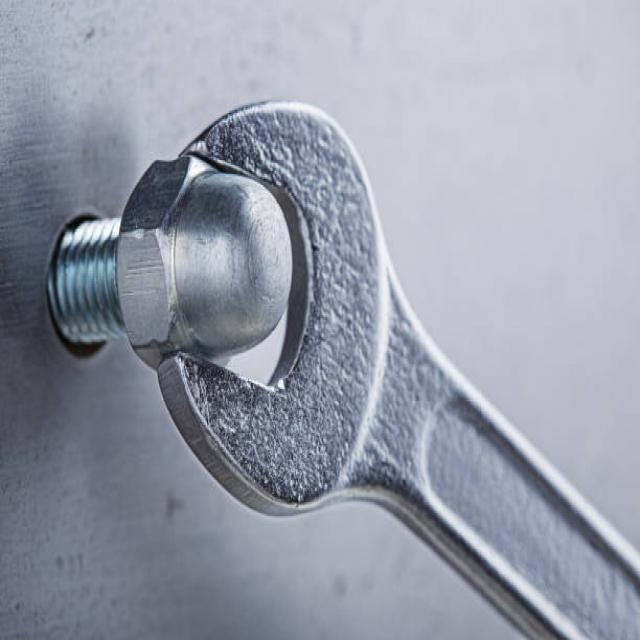

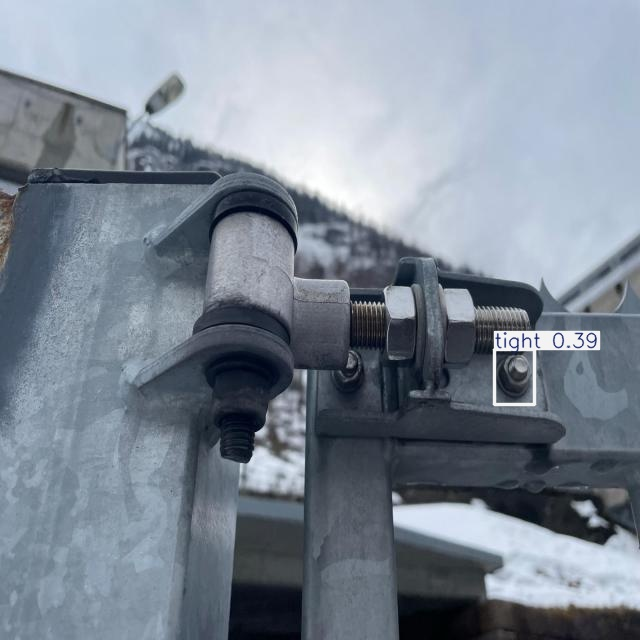

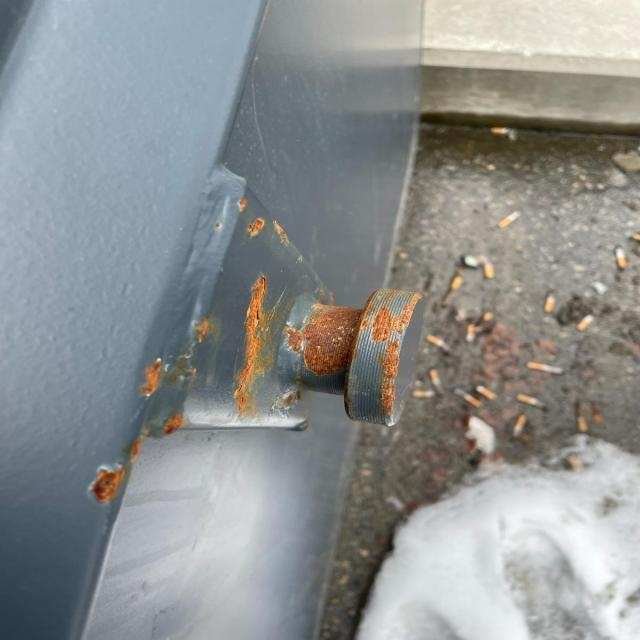

In [13]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [14]:
 project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/akankshyaparida/bolt-loosening-detection-zqvku/1/uploadModel?api_key=dEl35DkAiYAmOkN7osqu&modelType=yolov11&nocache=true


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
destination_path = '/content/drive/MyDrive/Object Detection Project/Our Dataset/Yolov11n'

In [20]:
import shutil

# Use shutil.copytree to copy the entire directory
shutil.copytree('/content/runs', destination_path, dirs_exist_ok=True)

'/content/drive/MyDrive/Object Detection Project/Our Dataset/Yolov11n'